In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 51 kB/s 
     |████████████████████████████████| 199 kB 41.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=e4fac1411af135fd8742274544ad9a457f73ef6b03520250000b194d0d1e3d29
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
from pyspark import SparkContext

In [ ]:
sc = SparkContext(master="local[2]")

In [ ]:
sc

<SparkContext master=local[2] appName=pyspark-shell>

In [ ]:
import pyspark

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName("BDA_Project").getOrCreate()

In [ ]:
df = spark.read.csv("/content/train.csv")

In [ ]:
df.show(5)

+-------------------+--------------+--------------------+---------+----------+--------------+--------------------+-------------------+-----------------+
|                _c0|           _c1|                 _c2|      _c3|       _c4|           _c5|                 _c6|                _c7|              _c8|
+-------------------+--------------+--------------------+---------+----------+--------------+--------------------+-------------------+-----------------+
|              Dates|      Category|            Descript|DayOfWeek|PdDistrict|    Resolution|             Address|                  X|                Y|
|2015-05-13 23:53:00|      WARRANTS|      WARRANT ARREST|Wednesday|  NORTHERN|ARREST, BOOKED|  OAK ST / LAGUNA ST|  -122.425891675136| 37.7745985956747|
|2015-05-13 23:53:00|OTHER OFFENSES|TRAFFIC VIOLATION...|Wednesday|  NORTHERN|ARREST, BOOKED|  OAK ST / LAGUNA ST|  -122.425891675136| 37.7745985956747|
|2015-05-13 23:33:00|OTHER OFFENSES|TRAFFIC VIOLATION...|Wednesday|  NORTHERN|ARRE

In [ ]:
df = spark.read.csv("/content/train.csv",header=True)

In [ ]:
df.show(5)

+-------------------+--------------+--------------------+---------+----------+--------------+--------------------+-------------------+------------------+
|              Dates|      Category|            Descript|DayOfWeek|PdDistrict|    Resolution|             Address|                  X|                 Y|
+-------------------+--------------+--------------------+---------+----------+--------------+--------------------+-------------------+------------------+
|2015-05-13 23:53:00|      WARRANTS|      WARRANT ARREST|Wednesday|  NORTHERN|ARREST, BOOKED|  OAK ST / LAGUNA ST|  -122.425891675136|  37.7745985956747|
|2015-05-13 23:53:00|OTHER OFFENSES|TRAFFIC VIOLATION...|Wednesday|  NORTHERN|ARREST, BOOKED|  OAK ST / LAGUNA ST|  -122.425891675136|  37.7745985956747|
|2015-05-13 23:33:00|OTHER OFFENSES|TRAFFIC VIOLATION...|Wednesday|  NORTHERN|ARREST, BOOKED|VANNESS AV / GREE...|   -122.42436302145|  37.8004143219856|
|2015-05-13 23:30:00| LARCENY/THEFT|GRAND THEFT FROM ...|Wednesday|  NORTHER

In [ ]:
df.count()

158942

In [ ]:
df.groupBy('Category').count().show()

+--------------------+-----+
|            Category|count|
+--------------------+-----+
|               FRAUD| 3034|
|             SUICIDE|   55|
|SEX OFFENSES FORC...|  830|
|         LIQUOR LAWS|  208|
|     SECONDARY CODES| 2021|
|     FAMILY OFFENSES|   77|
|      MISSING PERSON| 4761|
|      OTHER OFFENSES|20911|
|DRIVING UNDER THE...|  408|
|            WARRANTS| 7243|
|               ARSON|  263|
|SEX OFFENSES NON ...|   23|
|FORGERY/COUNTERFE...|  866|
|            GAMBLING|   14|
|             BRIBERY|   67|
|             ASSAULT|13316|
|         DRUNKENNESS|  800|
|           EXTORTION|   32|
|                TREA|    3|
|         WEAPON LAWS| 1647|
+--------------------+-----+
only showing top 20 rows



In [ ]:
df.select('category').distinct().count()

39

In [ ]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = spark.read.csv("/content/train.csv")
test = spark.read.csv("/content/test.csv")

In [4]:
df1 = pd.read_csv('/content/sample_data/train.csv')
df1.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [6]:
df1.shape

(72586, 9)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72586 entries, 0 to 72585
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Dates       72586 non-null  object 
 1   Category    72586 non-null  object 
 2   Descript    72585 non-null  object 
 3   DayOfWeek   72585 non-null  object 
 4   PdDistrict  72585 non-null  object 
 5   Resolution  72585 non-null  object 
 6   Address     72585 non-null  object 
 7   X           72585 non-null  float64
 8   Y           72585 non-null  float64
dtypes: float64(2), object(7)
memory usage: 5.0+ MB


In [9]:
df1.duplicated().sum()

190

In [10]:
df1.drop_duplicates(keep = 'first', inplace = True)
df1.shape

(72396, 9)

In [11]:
df1.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')

In [12]:
df1.nunique()

Dates         31679
Category         38
Descript        657
DayOfWeek         7
PdDistrict       10
Resolution       16
Address       12658
X             14701
Y             14701
dtype: int64

In [13]:
df1.Category.value_counts()

LARCENY/THEFT                  19520
OTHER OFFENSES                  9457
NON-CRIMINAL                    9128
ASSAULT                         6240
VEHICLE THEFT                   3681
VANDALISM                       3458
WARRANTS                        3131
BURGLARY                        2811
SUSPICIOUS OCC                  2523
MISSING PERSON                  2141
DRUG/NARCOTIC                   2124
ROBBERY                         1866
FRAUD                           1439
SECONDARY CODES                  929
WEAPON LAWS                      766
TRESPASS                         539
STOLEN PROPERTY                  455
SEX OFFENSES FORCIBLE            377
FORGERY/COUNTERFEITING           305
DRUNKENNESS                      277
KIDNAPPING                       238
DRIVING UNDER THE INFLUENCE      170
DISORDERLY CONDUCT               168
ARSON                            138
PROSTITUTION                     137
RUNAWAY                           85
EMBEZZLEMENT                      73
L

In [14]:
df1.Resolution.value_counts()

NONE                                      49308
ARREST, BOOKED                            16444
ARREST, CITED                              2730
UNFOUNDED                                  1039
PSYCHOPATHIC CASE                          1037
LOCATED                                     796
JUVENILE BOOKED                             455
EXCEPTIONAL CLEARANCE                       272
COMPLAINANT REFUSES TO PROSECUTE             87
JUVENILE CITED                               74
CLEARED-CONTACT JUVENILE FOR MORE INFO       48
PROSECUTED BY OUTSIDE AGENCY                 34
DISTRICT ATTORNEY REFUSES TO PROSECUTE       26
NOT PROSECUTED                               23
JUVENILE ADMONISHED                          12
JUVENILE DIVERTED                            10
Name: Resolution, dtype: int64

In [15]:
df1['Dates'] = pd.to_datetime(df1['Dates'])

df1['year'] = df1['Dates'].dt.year
df1['month'] = df1['Dates'].dt.month
df1['day_of_month'] = df1['Dates'].dt.day
df1['day_of_week'] = df1['Dates'].dt.day_of_week
df1['hour'] = df1['Dates'].dt.hour
df1.drop(['Dates', 'DayOfWeek'], axis = 1, inplace = True)
df1.dtypes

Category         object
Descript         object
PdDistrict       object
Resolution       object
Address          object
X               float64
Y               float64
year              int64
month             int64
day_of_month      int64
day_of_week       int64
hour              int64
dtype: object

In [16]:
df1.columns = [item.lower() for item in df1.columns]

In [17]:
pd.crosstab(df1['day_of_week'], df1['category'])

category,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
day_of_week,,,,,,,,,,,,,,,,,,,,,
0,28,847,3,5,405,25,15,347,25,18,...,0,62,5,358,0,74,513,547,445,106
1,19,794,1,2,407,19,19,306,28,8,...,3,73,1,373,1,71,464,468,458,91
2,21,879,1,7,424,33,25,339,34,8,...,1,65,4,407,0,79,468,555,497,103
3,15,848,3,3,380,26,15,349,35,11,...,4,67,5,376,0,77,447,467,462,114
4,23,924,3,5,487,23,28,280,30,11,...,0,69,4,357,0,82,494,552,454,111
5,19,968,0,3,368,18,36,245,67,8,...,1,64,5,336,0,80,568,556,434,112
6,13,980,0,5,340,24,32,258,58,9,...,2,55,2,316,0,76,504,536,381,129


In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

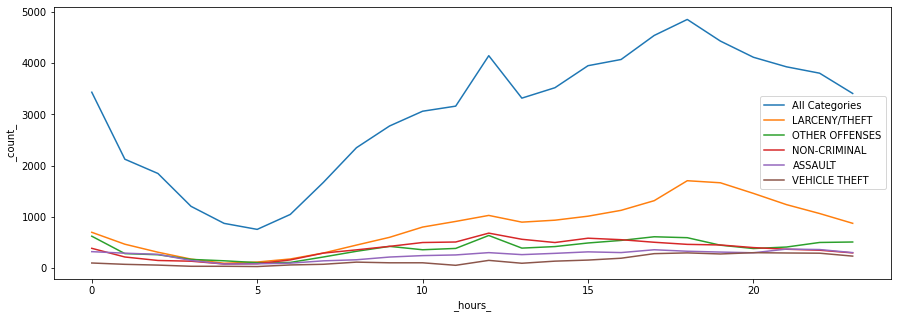

In [22]:
category_count = df1.category.value_counts().to_frame().reset_index()
top5category = category_count.iloc[:5] 

dfcategory = df1.hour.value_counts().to_frame().sort_index()
plt.figure(figsize = (15, 5))
plt.plot(dfcategory)

for item in top5category['index']:
    dfcategory = df1[df1.category == item].hour.value_counts().to_frame().sort_index()
    plt.plot(dfcategory)
plt.legend(['All Categories'] + list(top5category['index'].values))
plt.xlabel('_hours_')
_ = plt.ylabel('_count_')

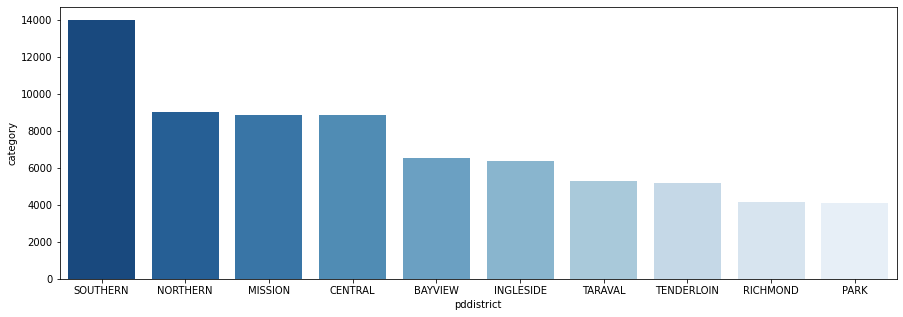

In [24]:
df2 = df1.groupby('pddistrict').count().reset_index()[['pddistrict', 'category']].sort_values('category', ascending = False)
plt.figure(figsize = (15, 5))
sns.barplot(x = 'pddistrict',y = 'category',data = df2, palette= 'Blues_r')

In [26]:
top100 = df1['descript'].value_counts()[:200].index
df1['descript'] = df1['descript'].apply(lambda x :x if x in top100 else 'other' )
x = df1.drop(['category', 'address'], axis = 1)
y = df1['category']

In [27]:
labEn = LabelEncoder()
y = labEn.fit_transform(y)
x['descript'] = labEn.fit_transform(x['descript'])
x['pddistrict'] = labEn.fit_transform(x['pddistrict'])
x['resolution'] = labEn.fit_transform(x['resolution'])

In [62]:
mms = MinMaxScaler()
x_train = mms.fit_transform(x_train)
x_test = mms.transform(x_test)

In [63]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15, random_state = 1)
print('x train :', x_train.shape,'\t\tx test :', x_test.shape)
print('y train :', y_train.shape,'\t\ty test :', y_test.shape)

x train : (61536, 10) 		x test : (10860, 10)
y train : (61536,) 		y test : (10860,)


In [69]:
x_train = x_train.fillna(x_train.mean())
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)

In [70]:
accuracy_score(y_pred, y_test)

0.8980662983425415

In [71]:
dtc = DecisionTreeClassifier(random_state= 1)
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

In [72]:
accuracy_score(y_pred, y_test)

0.9606813996316759

In [74]:
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [76]:
accuracy_score(y_pred, y_test)

0.800828729281768

In [75]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [77]:
accuracy_score(y_pred, y_test)

0.800828729281768